# CIS 410/510 Final project:  Real v. Fake News

For this project, I wanted to build a machine learning algorithm that could reliably detect fake or real news articles.

I found the following datasets of a collection of real and fake news articles:

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv


I wanted to directly compare two approaches:

1) Naive bayes using a word bag

2) ANN using word embeddings

Ultimately, I found that my ANN surpassed the Naive bayes predictions, with an accuracy of 94%(!) on the test set.

Finally, since the real and fake news articles were likely scraped from the same sources, I wanted to see how well I could predict real and fake news from an independent set of tweets.

## Import libraries


In [ ]:
import pandas as pd
import numpy as np
import datetime
import statistics

In [ ]:
my_seed = 1234
rsgen = np.random.RandomState(my_seed) 

In [ ]:
import spacy
!python -m spacy download en_core_web_md
import en_core_web_md
nlp = en_core_web_md.load()  

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
!rm -r  'uo_puddles'
my_github_name = 'uo-puddles' 
clone_url = f'https://github.com/{my_github_name}/uo_puddles.git'
!git clone $clone_url 
import uo_puddles.uo_puddles as up

Cloning into 'uo_puddles'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 282 (delta 2), reused 0 (delta 0), pack-reused 276
Receiving objects: 100% (282/282), 76.59 KiB | 5.47 MiB/s, done.
Resolving deltas: 100% (169/169), done.


In [ ]:
!rm -r  'py_datasci'
my_github_name = 'lfrank14' 
clone_url = f'https://github.com/{my_github_name}/py_datasci.git'
!git clone $clone_url 
import py_datasci.functions as lf

Cloning into 'py_datasci'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 21 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


## Data wrangling

### News datasets
This section is commented out but I wanted to take a shot at some data wrangling in Python. The news files were too large to upload to my google drive. I also tried to add them to my python library on github but again, the files were too large to upload. Ultimately, I had to upload locally, shuffle and take a random subset. I had to split the training and testing set 

### Fake news

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#import io
#fake_news = pd.read_csv(io.BytesIO(uploaded['fake.csv']))

In [ ]:
#fake = fake_news
#fake['isfake'] = 1

In [ ]:
#len(fake)

In [ ]:
#fake = fake.drop_duplicates(subset = 'text', keep = 'first', inplace = False)

In [ ]:
#len(fake)

In [ ]:
#fake['str_len'] = fake['text'].str.len()

In [ ]:
#fake.sort_values('str_len')[:10]

There are a number of fake articles that contain very few characters. It was difficult to decide which ones to remove and which to keep as some strings, though short in length, contained some meaning. 

Ultimately, I decided to match the minimum string lengths between the true and fake news datasets. The minimum string length in the true news data set was 145.

In [ ]:
#fake = fake[fake['str_len'] > 144]

In [ ]:
#len(fake)

In [ ]:
#fake.sort_values('str_len')[:10]

### True news

In [ ]:
#uploaded = files.upload()

In [ ]:
#true_news = pd.read_csv(io.BytesIO(uploaded['true.csv']))

In [ ]:
#true = true_news
#true['isfake'] = 0

In [ ]:
#len(true)

In [ ]:
#true = true.drop_duplicates(subset = 'text', keep = 'first', inplace = False).reset_index(drop=True)

In [ ]:
#len(true)

The true news dataset will need some extra wrangling. One thing I noticed is that the beginning text for the true news articles all contain:
  


> [CITY] (Reuters) - [text of article]


The term "Reuters" I think refers to the news organization. In using the word bag, this will bias the algorithm to look for any reference of the word "Reuters," which will give us near perfect accuracy in detecting the real news articles. So that my algorithm will generalize to other sources of news that do not contain that term, I will remove it from all text. The other potential bias is reference to cities. I'm hoping that the fake news articles will reference the same cities, otherwise I will figure out how to remove the opening city.

In [ ]:
#true['text'] = true['text'].str.replace("Reuters","")

In [ ]:
#true['str_len'] = true['text'].str.len()

In [ ]:
#true.sort_values('str_len')

### Create training and testing datasets

In [ ]:
# Shuffling the datasets
#shuffled_fake = fake.sample(frac=1, random_state = rsgen).reset_index(drop=True)
#shuffled_true = true.sample(frac=1, random_state = rsgen).reset_index(drop=True)

## Creating the training set
#train_true = shuffled_true[:5000]
#train_fake = shuffled_fake[:5000]
#news_train = pd.concat([train_true,train_fake])

## Creating the testing set
#test_true = shuffled_true[5000:7500]
#test_fake = shuffled_fake[5000:7500]
#news_test = pd.concat([test_true, test_fake])

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#with open('/content/gdrive/My Drive/Course Work/CIS510/news_train.csv', 'w') as file:
#    news_train.to_csv(file, index=False)

#with open('/content/gdrive/My Drive/Course Work/CIS510/news_test.csv', 'w') as file:
#    news_test.to_csv(file, index=False)

## Import wrangled news data

Note: I decided to subset the tables even further since it was taking too long and I had to go back and re-run to figure out something that was going wrong. 



In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTYDipSOaT-5W1dVYVdCHAPBRQCRAAcd6Z9ePHAUQ12YXGsg7sNLRk_bC-w-j8MNKasi_wUVYcMOcEp/pub?gid=696515214&single=true&output=csv'
news_train = pd.read_csv(url, encoding='utf-8')

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQPAqPt87GQ4DghJwnfiQyNxMVsBF6XW6fbBGAu7W8dLumDLLirF1ZDGzvtXYW17ztXLZA-rmcCxBM6/pub?gid=1005949462&single=true&output=csv'
news_test = pd.read_csv(url, encoding='utf-8')

In [ ]:
training_table = news_train.sample(frac=1, random_state = rsgen).reset_index(drop=True)
training_table = training_table[:750]
training_table.head()

,text,isfake,str_len
0,The Wikileaks e-mails are an incredible study ...,1,1167
1,Donald Trump is very afraid of Special Counsel...,1,2168
2,WASHINGTON () - When Donald Trump’s administra...,0,4764
3,"Babies in bags and in a freezer yes, this is...",1,4968
4,CARACAS () - Venezuelan President Nicolas Madu...,0,2239


In [ ]:
testing_table = news_test.sample(frac=1, random_state = rsgen).reset_index(drop=True)
testing_table = testing_table[:250]
testing_table.head()

,text,isfake,str_len
0,Immigration officials in Florida proved how ou...,1,2306
1,WASHINGTON () - Republican presidential candid...,0,1124
2,() - A reporter for the conservative website B...,0,3832
3,Massachusetts Rep. Jim McGovern brought the Ho...,1,3418
4,JAKARTA () - Students at an Islamic school tha...,0,2968


In [ ]:
training_text = training_table['text'].to_list()
training_text[:5]

['The Wikileaks e-mails are an incredible study in political destruction and corruption. The media has no shame in their clear effort to push Hillary to be our next president. It s really sickening to see that the media has compromised any integrity they ever had so they can put the CLINTON GRIFTERS back in the White House. It s like some kind of mafia crime family thing where there s clear coordination in doing unscrupulous things under the table to get your way. Pretty sick! A Politico reporter let an employee of the Democratic National Committee read a story he wrote about presumptive Democratic presidential nominee Hillary Clinton prior to its publication, according to emails allegedly sent by DNC staffers released by WikiLeaks on Friday.According to an email purportedly sent by Mark Paustenbach, the national press secretary and deputy communications director at the DNC, he made an  agreement  with Ken Vogel, chief investigative reporter at Politico, to read a copy of one of Vogel 

In [ ]:
training_labels = training_table['isfake'].to_list()

In [ ]:
testing_text = testing_table['text'].to_list()
testing_text[:5]

['Immigration officials in Florida proved how out of control things are in Trump s America by detaining the son of Muhammad Ali because his name happens to sound too Muslim for their liking.Muhammad Ali Jr. and his mother, Khalilah Camacho-Ali, were on their way home after speaking at a Black History Month event in Montego Bay, Jamaica. On Feb. 7, they flew into Fort Lauderdale, Florida. And then things took a disturbing turn.Chris Mancini, a lawyer and friend of the family says they were pulled to the side as they were going through customs. Khalilah Camacho-Ali was released when she pulled out a photo of her with the legendary boxer, but Muhammad Ali Jr. didn t have such a photo. Apparently, being related to a famous person would have meant more to officials than the fact that he s an American citizen with a U.S. passport to prove it.Ali Jr. was held by immigration officials and questioned for almost two hours. Where did you get your name from?  they asked him over and over. When the

In [ ]:
testing_labels = testing_table['isfake'].to_list()

## Naive bayes and Word Bags

### Build the word bag

In [ ]:
%%time

word_table = pd.DataFrame(columns=['word',0,1])
for i in range(len(training_text)):
  doc = nlp(training_text[i].lower())
  for token in doc:
    if token.is_alpha and not token.is_stop:
      lf.update_news_row(word_table, token.text, training_labels[i])


CPU times: user 3min 33s, sys: 1.08 s, total: 3min 35s
Wall time: 3min 35s


In [ ]:
len(word_table)

17939

In [ ]:
word_table.head()

,word,0,1
0,wikileaks,2,11
1,e,6,12
2,mails,1,3
3,incredible,1,12
4,study,5,6


In [ ]:
sorted_word_table = word_table.sort_values(by = 'word').reset_index(drop=True)
sorted_word_table = sorted_word_table.set_index('word')

In [ ]:
sorted_word_table.head()

,0,1
word,,
aai,1,0
aaron,1,4
aarp,1,0
aaski,1,0
abaad,2,0


In [ ]:
## Save for later ##
#from google.colab import drive
#drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#with open('/content/gdrive/My Drive/Course Work/CIS510/news_word_bag.csv', 'w') as file:
#    sorted_word_table.to_csv(file, index=True)

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTvilodc0GcehF4_mOs5ERyP66D84Kksv5_QaG3W4BDpRkc_6C_SOYxB3k4fahJAyzza16yP-TZdcm-/pub?gid=917600064&single=true&output=csv'
sorted_word_table = pd.read_csv(url, encoding='utf-8')
sorted_word_table = sorted_word_table.set_index('word')

In [ ]:
sorted_word_table.head()

,0,1
word,,
aa,4,4
aaa,0,7
aaaahhhh,0,1
aahd,2,0
aai,1,0


In [ ]:
sorted_word_table.tail()

,0,1
word,,
zygote,0,1
zyklon,0,1
zypries,4,0
zzzzzzzzzzzzz,0,1
à,1,0


### Calculate probability of each word in the testing text given the word bag


In [ ]:
%%time

result_list = []
for i in range(len(testing_text)):
  doc = nlp(testing_text[i].lower())

  e_list = []
  for token in doc:
    if token.is_alpha and not token.is_stop:
      e_list.append(token.text)
  
  result_list.append(lf.bayes_news(e_list, sorted_word_table, training_table))

CPU times: user 2min 23s, sys: 468 ms, total: 2min 24s
Wall time: 2min 24s


In [ ]:
result_list[:10]

[(2.2250738585072014e-308, 2.2250738585072014e-308),
 (3.3904919855540824e-169, 3.5723792199907374e-175),
 (2.2250738585072014e-308, 2.2250738585072014e-308),
 (2.2250738585072014e-308, 2.2250738585072014e-308),
 (2.2250738585072014e-308, 2.2250738585072014e-308),
 (2.2250738585072014e-308, 2.2250738585072014e-308),
 (6.391946713682439e-191, 5.171730712893636e-185),
 (8.398495070639507e-44, 1.1036047096876937e-51),
 (2.2250738585072014e-308, 2.2250738585072014e-308),
 (1.0858344554373462e-88, 1.5790122978836359e-81)]

In [ ]:
result_list[-10:]

[(2.2250738585072014e-308, 2.2250738585072014e-308),
 (8.263955914525682e-307, 8.072421411311434e-281),
 (2.2250738585072014e-308, 2.2250738585072014e-308),
 (2.2250738585072014e-308, 2.2250738585072014e-308),
 (2.2250738585072014e-308, 3.2015717698968154e-287),
 (3.837878501281144e-164, 6.406443751678595e-165),
 (2.2250738585072014e-308, 2.2250738585072014e-308),
 (2.2250738585072014e-308, 2.2250738585072014e-308),
 (4.080305947799327e-148, 1.485198904740985e-134),
 (2.2250738585072014e-308, 2.2250738585072014e-308)]

### Generate predictions and compute accuracy

In [ ]:
predictions = []
for i in range(len(result_list)):
  probs = result_list[i]
  max_prob = max(probs)
  prediction = 0
  if probs.index(max_prob)==1:
    prediction = 1
  predictions.append(prediction)

In [ ]:
predictions[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

In [ ]:
testing_labels[:10]

[1, 0, 0, 1, 0, 0, 1, 0, 1, 1]

In [ ]:
predictions[-10:]

[0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

In [ ]:
testing_labels[-10:]

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1]

In [ ]:
sum(predictions) # the number of "fake" predictions,

60

In [ ]:
zipped = list(zip(testing_labels, predictions))
zipped[:10]

[(1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1)]

In [ ]:
(zipped.count((0,0)) + zipped.count((1,1)))/len(testing_labels)

0.664

In [ ]:
testing_labels.count(0)/len(testing_labels) ## Accuracy to beat

0.456

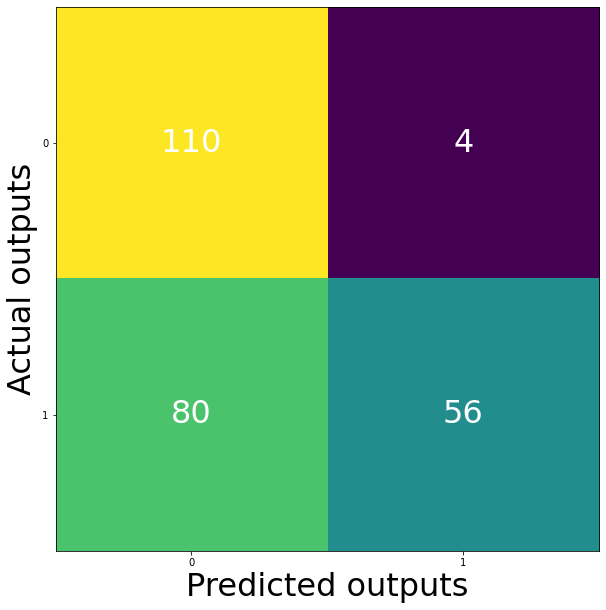

In [ ]:
up.heat_map(zipped, [0,1])

### Possible biases in Naive Bayes

**Length of articles**

The length of the real/fake news articles vary in length. One thing I think I should check is the average length for real and fake news articles. Having more data for one type of article over the other might create a bias in the algorithm to always pick that type.




In [ ]:
length_real = []
length_fake = []
for i in range(len(training_text)):
  article_label = training_labels[i]
  article_length = len(training_text[i])
  if article_label == 0:
    length_real.append(article_length)
  else:
    length_fake.append(article_length)

In [ ]:
statistics.mean(length_real)

2353.903314917127

In [ ]:
statistics.mean(length_fake)

2721.5103092783506

**Equally probable outcomes**

The first time I ran this, my algorithm was always predicting the articles were "real." After some troubleshooting I realized this was because I did not index 'sorted_word_table' with the 'word' column. What ended up happening was each article had the lowest probability possible for each outcome. Upon which, I realized that when the outcomes were equally probable, it was always picking the first outcome ("real"). I realize this is a major problem- when the probabilities are equal it still needs to make a decision, so it just picks the first outcome. This is likely why I see a much higher prediction rate of "real" or 0. 

It is possible that some of the words in the test articles are not appearing in the word bag, in which case the smallest probability possible is assigned to each outcome. One way to get around this might be by creating a larger word bag, which would need a larger training set. 

## Artifical Neural Nets and Word Embeddings

### Create word embedding vectors for each news article

In [ ]:
train_vectors = []
for i in range(len(training_text)):
  article = training_text[i]
  vec = lf.sent2vec(article)
  train_vectors.append(vec)

CPU times: user 1min 3s, sys: 1.49 s, total: 1min 5s
Wall time: 1min 5s


In [ ]:
len(train_vectors)

750

In [ ]:
test_vectors = []
for i in range(len(testing_text)):
  article = testing_text[i]
  vec = lf.sent2vec(article)
  test_vectors.append(vec)

In [ ]:
len(test_vectors)

250

In [ ]:
testing_labels.count(0)/len(testing_labels) ## Accuracy to beat

0.456

### Setup initial model and beging training to get an idea of how long it takes

In [ ]:
m = up.ann_build_model(300,[150,75,25,10,5,1])

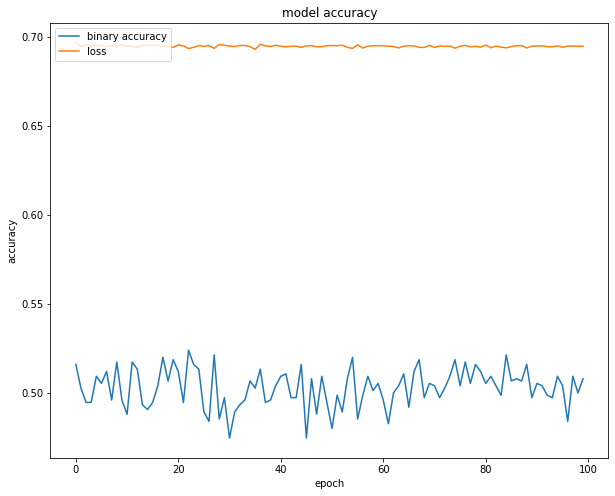

CPU times: user 1min 12s, sys: 6.18 s, total: 1min 18s
Wall time: 55.2 s


In [ ]:
%%time
training = up.ann_train(m, train_vectors, training_labels, 100)

In [ ]:
training.history['binary_accuracy'][-10:]

[0.5053333044052124,
 0.5040000081062317,
 0.4986666738986969,
 0.4973333477973938,
 0.5093333125114441,
 0.5040000081062317,
 0.48399999737739563,
 0.5093333125114441,
 0.5,
 0.5080000162124634]

In [ ]:
predictions = m.predict(test_vectors)
predictions = [int(round(x[0])) for x in predictions]
zipped = list(zip(testing_labels, predictions))

(zipped.count((0,0)) + zipped.count((1,1)))/len(test_vectors)

0.544

### Try more training and see what happens

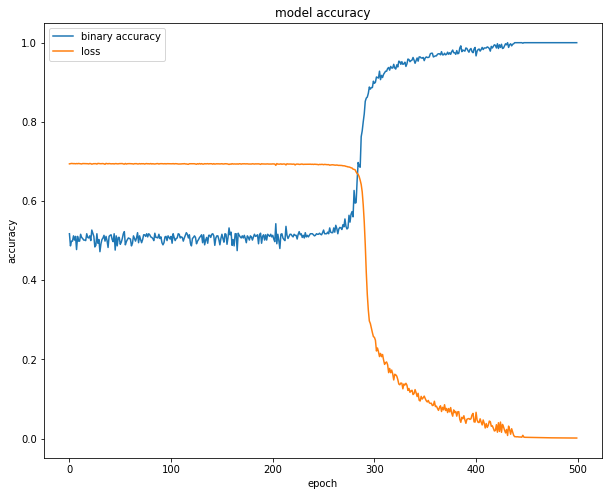

CPU times: user 6min, sys: 29.7 s, total: 6min 30s
Wall time: 4min 32s


In [ ]:
%%time 

training = up.ann_train(m, train_vectors, training_labels, 500)

In [ ]:
training.history['binary_accuracy'][-10:]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
predictions = m.predict(test_vectors)
predictions = [int(round(x[0])) for x in predictions]
zipped = list(zip(predictions, testing_labels))

(zipped.count((0,0)) + zipped.count((1,1)))/len(test_vectors)

0.94

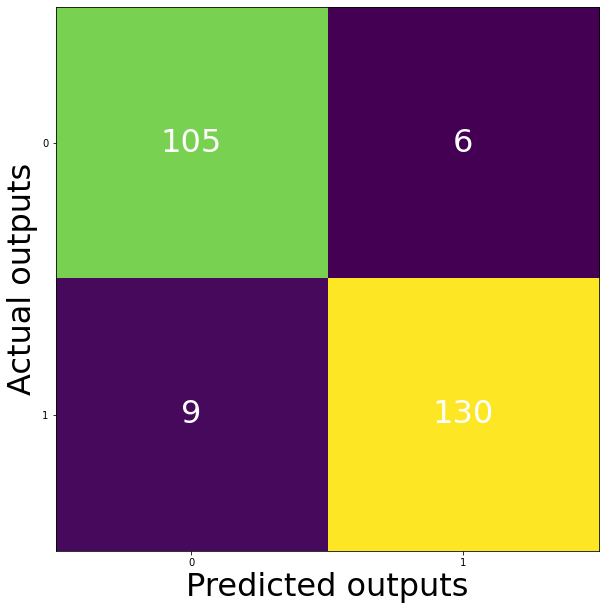

In [ ]:
up.heat_map(zipped, [0,1])

### Grid search to test different hyperparameters

Well I was going to but it looks like I hit perfect accuracy? Let's see how it generalizes to an independent dataset!

In [ ]:
#up.grid_search([[150,75,25,1], [....]], [10,25,50], train_vectors, training_labels)

## Trump tweets

I realize this is a little beyond the scope of the final project, but I thought it would be fun to see how the algorithms generalize to a "randomly" chosen set of tweets. Unfortunately, I'm not able to actually test the accuracy of the algorithms on the tweets. Still, in light of recent events, I thought it would be interesting to evaluate which POTUS tweets get deemed as "real" or "fake."


I took a random sample of tweets from 2019 and 2020.


It is worth nothing, one likely area of bias here is that the language used in the fake articles is much more colloquial, akin to the language one would use in tweets.


In [ ]:
#url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRtwK2yfg5L5lRaMR1WPRePsMN9PST5GBUJPZJal6ZQ4x1VhF674IjfEhcSIawKFi4JUdDjkfkievnC/pub?gid=1108699977&single=true&output=csv'
#trump = pd.read_csv(url, encoding='utf-8')

#trump['date'] = pd.to_datetime(trump['date'])
#trump['just_date'] = trump['date'].dt.date
#trump2 = trump[(trump['just_date'] > datetime.date(2018,12,31))]

#from google.colab import drive
#drive.mount('/content/gdrive')
#with open('/content/gdrive/My Drive/Course Work/CIS510/trump2.csv', 'w') as file:
#    trump2.to_csv(file, index=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQd1heGFfpyz7LnROtsiIvIJlRWLMbYMlZSVhJmWMFqShQacACa-y9Xtwcn_tew2lyUYNnQ0Bna3VDs/pub?gid=1997604225&single=true&output=csv'
trump_tweets = pd.read_csv(url, encoding='utf-8')
testing_table = trump_tweets.sample(frac=1, random_state = rsgen).reset_index(drop=True)
len(testing_table)

5614

In [ ]:
testing_table = testing_table.drop_duplicates(subset = 'content', keep = 'first', inplace = False).reset_index(drop=True)

In [ ]:
len(testing_table)

5563

In [ ]:
testing_table = testing_table[:500]

In [ ]:
testing_table.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,just_date
0,1.160000e+18,https://twitter.com/realDonaldTrump/status/116...,No debate on Election Security should go forwa...,8/13/19 19:46,36079,134610,NaN,NaN,8/13/19
1,1.120000e+18,https://twitter.com/realDonaldTrump/status/111...,On National Former Prisoner of War Recognition...,4/9/19 10:31,11367,51626,NaN,NaN,4/9/19
2,1.190000e+18,https://twitter.com/realDonaldTrump/status/119...,"Years ago, when Media was legitimate, people k...",11/6/19 23:06,23416,109161,NaN,NaN,11/6/19
3,1.220000e+18,https://twitter.com/realDonaldTrump/status/122...,Will be Great!https://twitter.com/WhiteHouse/s...,1/22/20 13:12,8471,41085,NaN,NaN,1/22/20
4,1.140000e+18,https://twitter.com/realDonaldTrump/status/113...,"Today, here in Iowa, we honor America’s cheris...",6/11/19 16:45,12044,50267,NaN,NaN,6/11/19


In [ ]:
testing_table.tail()

,id,link,content,date,retweets,favorites,mentions,hashtags,just_date
495,1.110000e+18,https://twitter.com/realDonaldTrump/status/110...,VETO!,3/14/19 14:16,33712,155776,NaN,NaN,3/14/19
496,1.130000e+18,https://twitter.com/realDonaldTrump/status/112...,The golden era of American energy is now under...,5/14/19 19:25,21853,96539,NaN,NaN,5/14/19
497,1.190000e+18,https://twitter.com/realDonaldTrump/status/118...,The Democrats Scam goes on and on! They Do Not...,10/22/19 23:10,9452,35986,NaN,NaN,10/22/19
498,1.190000e+18,https://twitter.com/realDonaldTrump/status/119...,Fake News is reporting that I am talking to Ma...,11/9/19 5:41,20763,95669,NaN,NaN,11/9/19
499,1.100000e+18,https://twitter.com/realDonaldTrump/status/110...,Thank you @ foxandfriends. Great show!,3/8/19 6:26,6770,46326,@foxandfriends,NaN,3/8/19


In [ ]:
trump_text = testing_table.content.to_list()
trump_text[:10]

['No debate on Election Security should go forward without first agreeing that Voter ID (Identification) must play a very strong part in any final agreement. Without Voter ID, it is all so meaningless!',
 'On National Former Prisoner of War Recognition Day, we honor the Americans captured and imprisoned by foreign powers while carrying out their duties to defend this great Nation...https://www.whitehouse.gov/presidential-actions/proclamation-national-former-prisoner-war-recognition-day-2019/ …',
 'Years ago, when Media was legitimate, people known as “Fact Checkers” would always call to check and see if a story was accurate. Nowadays they don’t use “Fact Checkers” anymore, they just write whatever they want!',
 'Will be Great!https://twitter.com/WhiteHouse/status/1219708789957578752 …',
 'Today, here in Iowa, we honor America’s cherished farming heritage. We salute your commitment to American Energy Independence — and we celebrate the bright future we are forging together powered by cl

### Naive Bayes

In [ ]:
%%time

result_list = []
for i in range(len(trump_text)):
  doc = nlp(trump_text[i].lower())

  e_list = []
  for token in doc:
    if token.is_alpha and not token.is_stop:
      e_list.append(token.text)
  
  result_list.append(lf.bayes_news(e_list, sorted_word_table, training_table))

CPU times: user 29.3 s, sys: 3.05 ms, total: 29.3 s
Wall time: 29.3 s


In [ ]:
result_list[:10]

[(6.709538788865325e-32, 5.615239818639416e-32),
 (1.277086214053949e-37, 1.0109545563677569e-37),
 (5.569640544698012e-42, 2.892545105973314e-36),
 (7.018181597872251e-05, 0.0001315771944166894),
 (2.5178284969426817e-59, 1.7174511157916566e-57),
 (1.600267343327367e-45, 1.7024869361231968e-44),
 (9.823977330464683e-54, 7.26424530382222e-51),
 (1.52734641793212e-43, 2.1523515336559126e-40),
 (1.7342872055881506e-49, 4.872622088670101e-48),
 (5.632447501183032e-46, 1.7360725221625577e-47)]

In [ ]:
predictions = []
for i in range(len(result_list)):
  probs = result_list[i]
  max_prob = max(probs)
  prediction = 0
  if probs.index(max_prob)==1:
    prediction = 1
  predictions.append(prediction)

In [ ]:
predictions[:10]

[0, 0, 1, 1, 1, 1, 1, 1, 1, 0]

In [ ]:
sum(predictions) # number of "fake" predictions

404

In [ ]:
len(trump_text)-sum(predictions) # number of "real" predictions

96

In [ ]:
# sort to see which ones were most likely real, and which were more likely false
prob_diff = []
for i in range(len(result_list)):
  probs0, probs1 = result_list[i]
  prob_diff.append(probs0-probs1)

In [ ]:
zipped = list(zip(prob_diff, trump_text))

In [ ]:
zipped.sort(reverse=True) 
zipped[:20] # more likely real than fake

[(0.000522011532700287, 'VETO!'),
 (8.000265778879755e-07, 'PLENTY OF OIL!'),
 (5.077419520039011e-07,
  'Departing for India with Melania!pic.twitter.com/sZhb3E1AoB'),
 (2.649515261720683e-08,
  'Get this straightened out, Governor @ GavinNewsomhttps://twitter.com/JackPosobiec/status/1212120082832412678 …'),
 (3.1001347969107377e-09,
  'A true Democrat Party leader!https://twitter.com/israel_advocacy/status/1208771819605508096 …'),
 (7.952645411713352e-10, 'They are staging a coup against Bernie!'),
 (3.1147680148026784e-11,
  '96-0 in the United States Senate. Congratulations AMERICA!'),
 (7.866353200441232e-12,
  'Poll: Trump leads top 2020 Democrats in Wisconsin https://thehill.com/homenews/campaign/471335-poll-trump-leads-top-democratic-opponents-in-wisconsin ….'),
 (6.987158955803867e-12,
  'Last night in North Carolina was incredible!https://twitter.com/realDonaldTrump/status/1171228988024311809 …'),
 (1.5488910259947146e-12,
  '.....But we are winning big, and they will soon be

In [ ]:
zipped[-20:] # more likely fake than real

[(-8.211642702645998e-05,
  '“Give Up, Trump-Haters” https://nypost.com/2019/04/04/ny-times-washington-post-are-still-disgracefully-enabling-collusion-delusion/ …pic.twitter.com/0Bt2jyorMn'),
 (-9.58584101459791e-05, '....BUT THE BEST IS YET TO COME!'),
 (-0.00032263324559973837, 'So much FAKE NEWS!'),
 (-0.00034449224151692203,
  'MAKE AMERICA GREAT AGAIN and then, KEEP AMERICA GREAT!!!!'),
 (-0.00034449224151692203, 'KEEP AMERICA GREAT!'),
 (-0.0012126316116562895,
  'JOBS, JOBS, JOBS! # PromisesMadePromisesKeptpic.twitter.com/yIOxpzCNb7'),
 (-0.0012804121207391189,
  'Do you think they like me?pic.twitter.com/TDmUnJ8HtF'),
 (-0.0015136948271072747, 'HAPPY EASTER!pic.twitter.com/UX5Bhm82H2'),
 (-0.0018031948180195051,
  'Thank you!https://twitter.com/eaglelion7/status/1149505573206937601 …'),
 (-0.0018031948180195051, 'Thank you! # MAGA2020pic.twitter.com/6G2TinCpWT'),
 (-0.0018031948180195051,
  'Thank you so much, Franklin!https://twitter.com/Franklin_Graham/status/1134499134700961

In [ ]:
doc = nlp(trump_text[3])
for token in doc:
  if token.is_alpha and not token.is_stop:
    print(token.text)

WhiteHouse


In [ ]:
doc

Will be Great!https://twitter.com/WhiteHouse/status/1219708789957578752 …

Realizing another potential area for bias that would need to be resolved through some data wrangling is spacy is still creating tokens of links. The fake news articles had more links, and it could be picking up on that.

In [ ]:
sorted_word_table.loc['twitter'] # real articles contain the word "twitter" less often than fake articles

0     535
1    1076
Name: twitter, dtype: int64

In [ ]:
sorted_word_table.loc['com']

0    0
1    3
Name: com, dtype: int64

### ANN


In [ ]:
trump_vectors = []
for i in range(len(trump_text)):
  article = trump_text[i]
  vec = lf.sent2vec(article)
  trump_vectors.append(vec)

In [ ]:
len(trump_vectors)

500

In [ ]:
predictions = m.predict(trump_vectors)

In [ ]:
rounded_predictions = [int(round(x[0])) for x in predictions]
rounded_predictions[:10]

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [ ]:
sum(rounded_predictions) # number of tweets predicted "fake"

386

In [ ]:
len(predictions) - sum(rounded_predictions) # number of tweets predicted "real"  

114

In [ ]:
zipped = list(zip(predictions,trump_text))
zipped.sort()

In [ ]:
zipped[:20] # tweets predicted most real

[(array([0.0004594], dtype=float32),
  'Get this straightened out, Governor @ GavinNewsomhttps://twitter.com/JackPosobiec/status/1212120082832412678 …'),
 (array([0.00045952], dtype=float32),
  'Departing for India with Melania!pic.twitter.com/sZhb3E1AoB'),
 (array([0.00046045], dtype=float32), 'VETO!'),
 (array([0.00046211], dtype=float32),
  'We have appointed 220 Federal Judges and two Supreme Court Justices. PROMISES MADE, PROMISES KEPT!pic.twitter.com/fVw6tJ89Wd'),
 (array([0.00047129], dtype=float32),
  '“IT WAS A PERFECT CONVERSATION WITH UKRAINE PRESIDENT!”'),
 (array([0.00047392], dtype=float32),
  'Just spoke with Jacinda Ardern, the Prime Minister of New Zealand, regarding the horrific events that have taken place over the past 24 hours. I informed the Prime Minister....'),
 (array([0.00047547], dtype=float32),
  'Wow! Big VICTORY on the Wall. The United States Supreme Court overturns lower court injunction, allows Southern Border Wall to proceed. Big WIN for Border Security

In [ ]:
zipped[-20:] # tweets predicted most fake

[(array([0.9997215], dtype=float32),
  'MAKE AMERICA GREAT AGAIN and then, KEEP AMERICA GREAT!!!!'),
 (array([0.99972236], dtype=float32),
  'Would Chris Cuomo be given a Red Flag for his recent rant? Filthy language and a total loss of control. He shouldn’t be allowed to have any weapon. He’s nuts!'),
 (array([0.9997225], dtype=float32),
  '“The reason we have the Special Counsel investigation is that James Comey (a dirty cop) leaked his memos to a friend, who leaked them to the press, on purpose.” @ KennedyNation Totally illegal!'),
 (array([0.9997225], dtype=float32),
  '“We can’t beat him, so lets impeach him!” Democrat Rep. Al Green'),
 (array([0.9997226], dtype=float32),
  'Hard to believe that @ FoxNews will be interviewing sleazebag & totally discredited former FBI Director James Comey, & also corrupt politician Adam “Shifty” Schiff. Fox is trying sooo hard to be politically correct, and yet they were totally shut out from the failed Dem debates!'),
 (array([0.99972296], dtype=